In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_img(img):
    new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

# def displayImages(img1,img2,img3):
#     fig= plt.figure(figsize=(10,20))
#     fig.add_subplot(1, 3, 1)
#     plt.imshow(img1, cmap='gray')
#     plt.axis('off')
#     plt.title("original")

#     fig.add_subplot(1, 3, 2)
#     plt.imshow(img2, cmap='gray')
#     plt.axis('off')
#     plt.title("image with red mask")
#     plt.show()

#     fig.add_subplot(1, 3, 3)
#     plt.imshow(img3, cmap='gray')
#     plt.axis('off')
#     plt.title("image with blue mask")
#     plt.show()



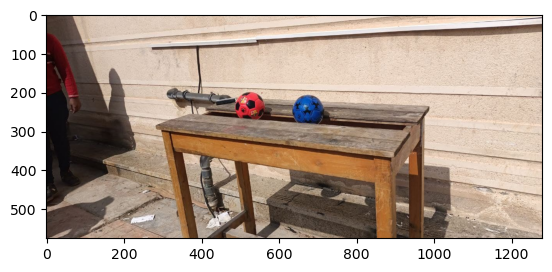

In [93]:
image = cv.imread('./Task8.1_Balls_dataset/rb_021.jpg')
img_new = image.copy()

blurred = cv.GaussianBlur(img_new, (15, 15), 0)

hsv_image = cv.cvtColor(blurred, cv.COLOR_BGR2HSV)

hsv_lower_blue = np.array([100, 100, 100])
hsv_upper_blue = np.array([140, 255, 255])
hsv_lower_red = np.array([160, 100, 100])
hsv_upper_red= np.array([180, 255, 255])

# create masks 
extracted_img_red = cv.inRange(hsv_image, hsv_lower_red, hsv_upper_red)
extracted_img_blue = cv.inRange(hsv_image, hsv_lower_blue, hsv_upper_blue)

# show the image with masks
masked_img_red = cv.bitwise_and(image, image, mask=extracted_img_red)
masked_img_blue = cv.bitwise_and(image, image, mask=extracted_img_blue)

# cv.imshow('original', image)
# cv.imshow("mask with red", masked_img_red)
# cv.imshow("mask with blue", masked_img_blue)
# cv.waitKey(0)
# cv.destroyAllWindows()
display_img(image)

In [32]:
# Create a function to capture mouse clicks
def get_color(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        color = image[y, x]
        print(f"Clicked color (BGR): {color}")

# Create a window and set the mouse callback
cv.namedWindow('original')  # should be the same name as below (original)
cv.setMouseCallback('original', get_color)


cv.imshow('original', image)
cv.waitKey(0)
cv.destroyAllWindows()

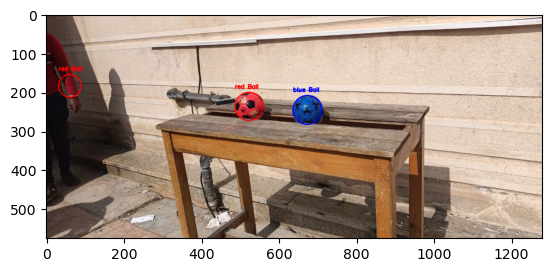

In [94]:
# Find contours in the masks
red_contours, _ = cv.findContours(extracted_img_red, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
blue_contours, _ = cv.findContours(extracted_img_blue, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in blue_contours:
    if cv.contourArea(contour) > 150:  
        (x, y), radius = cv.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv.circle(image, center, radius, (255, 0, 0), 2)
        cv.putText(image, 'blue Ball', (int(x - radius), int(y - radius - 10)), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

for contour in red_contours:
    if cv.contourArea(contour) > 150:  
        (x, y), radius = cv.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv.circle(image, center, radius, (0, 0, 255), 2)
        cv.putText(image, 'red Ball', (int(x - radius), int(y - radius - 10)), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)


# Display the result
cv.imshow('Balls detected', image)
cv.waitKey(0)
cv.destroyAllWindows()

display_img(image)